In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
cnn_model= Sequential()

In [3]:
cnn_model.add(Convolution2D(filters=32, 
                             kernel_size=(3,3), 
                             input_shape=(64, 64, 3), 
                             kernel_initializer='he_uniform', 
                             activation='relu'))

In [4]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
cnn_model.add(Convolution2D(filters=32,
                             kernel_size=(3,3), 
                             kernel_initializer='he_uniform', 
                             activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
cnn_model.add(Flatten())

In [7]:
cnn_model.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu')) 
cnn_model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [11]:
training_set= train_datagen.flow_from_directory(directory= 'dataset/training_set',
                                               target_size=(64,64),
                                               batch_size=50,
                                               class_mode='binary' 
                                               )

Found 8000 images belonging to 2 classes.


In [12]:
test_set= test_datagen.flow_from_directory(directory= 'dataset/test_set',
                                               target_size=(64,64), 
                                               batch_size=50,
                                               class_mode='binary'
                                          )

Found 2000 images belonging to 2 classes.


In [25]:
history=cnn_model.fit_generator(training_set, 
                        steps_per_epoch=int(8000/50),
                        epochs=5, 
                        validation_data=test_set, 
                        validation_steps=int(2000/50) 
                        )

Epoch 1/5
160/160 [==============================] - 72s 448ms/step - loss: 0.4325 - accuracy: 0.8006 - val_loss: 0.5712 - val_accuracy: 0.7275
Epoch 2/5
160/160 [==============================] - 75s 468ms/step - loss: 0.4229 - accuracy: 0.8066 - val_loss: 0.4838 - val_accuracy: 0.7800
Epoch 3/5
160/160 [==============================] - 72s 450ms/step - loss: 0.4168 - accuracy: 0.8080 - val_loss: 0.4870 - val_accuracy: 0.7825
Epoch 4/5
160/160 [==============================] - 73s 453ms/step - loss: 0.4070 - accuracy: 0.8101 - val_loss: 0.4804 - val_accuracy: 0.7815
Epoch 5/5
160/160 [==============================] - 70s 439ms/step - loss: 0.3968 - accuracy: 0.8219 - val_loss: 0.4562 - val_accuracy: 0.7910


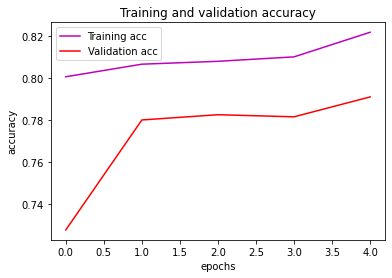

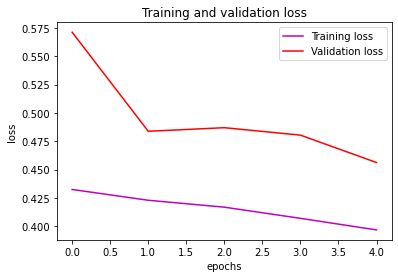

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0, 5)

plt.plot(epochs, acc, 'm', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'm', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [56]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [57]:
prediction

'dog'

In [58]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [59]:
prediction

'cat'